### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### Has the network latency gone up since we switched internet service providers?



Ho: Latency has remained the same or descreased  
Ha: Latency has increased

Type 1 error: reject null hypothesis even though latency has not been affected  

Type 2 error: we reject null hypothesis because we think there is no affect, but latency has actually slowed

### Is the website redesign any good?



#### Has the traffic to the website gone up due to the redesign?

Ho: The website redesign has no affect on website traffic  
Ha: The website redesign has had an affect on website traffic  

Type 1 error: reject any affect on traffic     

Type 2 error: rejected traffic coming to website due to redesign when in actuality there is more engagement  

### Is our television ad driving more sales?


#### Is our television ad running in prime time television driving more sales?  

Ho: Sales are not affected with this ad running in prime time  
Ha: Sales are up due to this ad running in prime time  

Type 1 error: reject that sales stay consistent during ad run in prime time  

Type 2 error: reject change in sales but sales have risen  

### Central Limit Theorem

- A population (that is not necessarily normally distributed)
- Taking samples (of sufficient size) will result in normally distributed sample means


In [252]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

np.random.seed(123)

 

In [6]:
# define a roll [1,2,3,4,5,6]

# set sample size of 10


n_dice_per_experiment = ncols =10
n_experiments = nrows = 100

# 100 rows and 10 columns
data = np.random.randint(1,7, (nrows, ncols))

data[:4]

array([[6, 3, 5, 3, 2, 4, 3, 4, 2, 2],
       [1, 2, 2, 1, 1, 2, 4, 6, 5, 1],
       [1, 5, 2, 4, 3, 5, 3, 5, 1, 6],
       [1, 2, 4, 5, 5, 5, 2, 6, 4, 3]])

In [7]:
calculated_averages = data.mean(axis=1)
calculated_averages

array([3.4, 2.5, 3.5, 3.7, 3.2, 4.7, 3.4, 3.2, 3.4, 3. , 3.7, 3.5, 4. ,
       4.5, 2.9, 2.8, 2.9, 3.8, 3.2, 3.6, 3.4, 4. , 3.5, 3.3, 3.6, 3. ,
       4.3, 3. , 3.3, 3.2, 4.2, 3.9, 3.2, 3.8, 3.6, 3.4, 2.7, 3.4, 3.2,
       3.1, 3.2, 3. , 4.1, 3.3, 3. , 4.1, 3.4, 3.3, 2.9, 3.8, 3.4, 3.6,
       3.9, 3.2, 4.7, 3.8, 3.5, 2.8, 3.8, 4.7, 4.1, 3.5, 2.8, 3.7, 3.4,
       3.7, 3.6, 4.1, 3.6, 3.5, 2.9, 4. , 3.2, 3.4, 4.4, 2.9, 3.2, 3.9,
       1.9, 3. , 3. , 3.5, 3.3, 4.4, 3.4, 4.2, 4.1, 3.2, 3.5, 3.5, 3.8,
       3.1, 3.6, 2.9, 2.9, 4. , 3.3, 3.1, 3.4, 3.6])

Text(0.5, 1.0, 'Outcome of averaging 10 dice rolls 100 times')

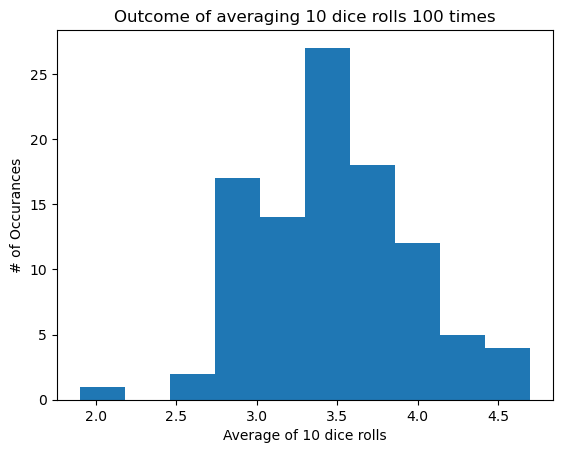

In [8]:
plt.hist(calculated_averages)
plt.xlabel(f'Average of {n_dice_per_experiment} dice rolls')
plt.ylabel('# of Occurances')
plt.title(f'Outcome of averaging {n_dice_per_experiment} dice rolls {n_experiments} times')


In [ ]:
# one sample T-test

1. plot distributions
2. establish hypothesis

# assumptions

-Variance

In [19]:
import env

db_url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/telco_churn'
df = pd.read_sql('SELECT * FROM customers', db_url)  



In [20]:
df.columns


Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn'],
      dtype='object')

<AxesSubplot:>

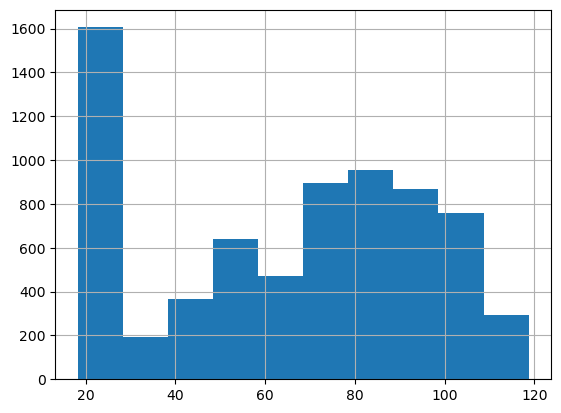

In [21]:
df.monthly_charges.hist()


<AxesSubplot:>

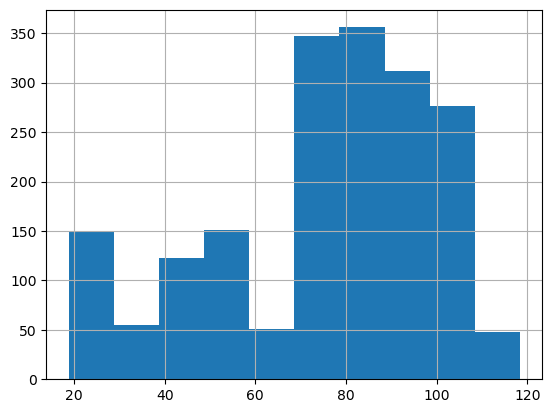

In [22]:
# filter for a sample who churn

churn_sample = df[df.churn == 'Yes'].monthly_charges

churn_sample.hist()


In [24]:
## set hypothese
H_0: mean of monthly charges of churned customers <= mean of monthly charges of all customers

H_a: mean of monthly charges of churned customers > mean of monthly charges of all customers

In [2]:
## set alpha value

alpha = .05

In [29]:
df.churn.value_counts()



No     5174
Yes    1869
Name: churn, dtype: int64

In [30]:
churn_sample = df[df.churn == 'Yes'].monthly_charges
overall_mean = df.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)


16.96540308050567 1.8703196496911995e-60 0.05


In [ ]:
# look at the t-statistic
# is t > 0
# look at the p/2
# is p/2 < alpha



In [34]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


We reject $H_{0}$


In [35]:
# compare the calculated p-value to alpha

p < alpha

if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothese')
    
    

We reject the null hypothesis


<AxesSubplot:>

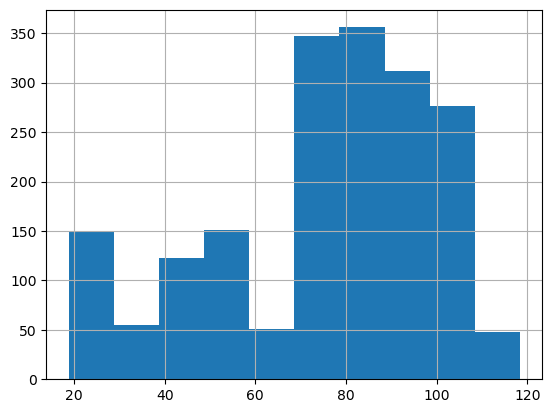

In [37]:
# independent t-test (a.k.a Two Sample t-test)   

# Goal: Compare the mean of some Group A to that of Group B

# Group A: Customer who churn

# customer who churn
churn_sample = df[df.churn == 'Yes'].monthly_charges

churn_sample.hist()



<AxesSubplot:>

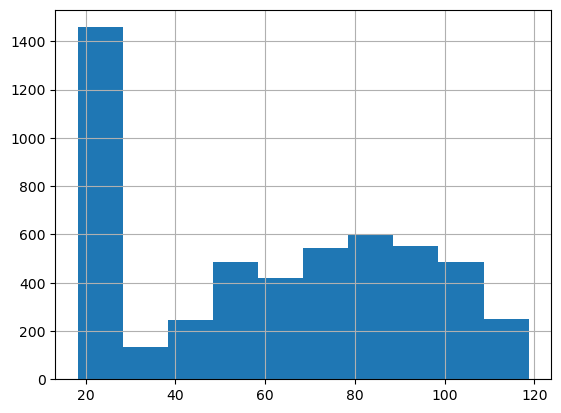

In [38]:
no_churn_sample = df[df.churn == 'No'].monthly_charges

no_churn_sample.hist()

## CUSTOMER WHO CHURN ARE CHARGED MORE THAN CUSTOMERS WHO DO NOT CHURN

### set hypothesis

H_0: Group who churn <= Group who do not churn  
H_a: Monthly charges of group who churn  > Monthly charges of group who do not churn

In [52]:
df = sns.load_dataset('iris')
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [42]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [49]:
df.sepal_length.describe()


count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [50]:
versicolor_sepal_length = df[df.species == 'versicolor'].sepal_length
virginica_sepal_length = df[df.species == 'virginica'].sepal_length
setosa_sepal_length = df[df.species == 'setosa'].sepal_length


<AxesSubplot:>

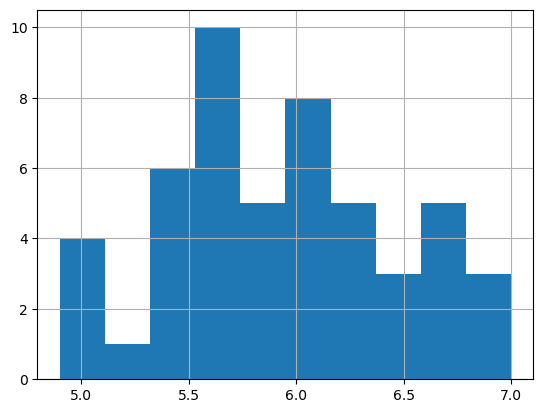

In [58]:
versicolor_sepal_length.hist()



<AxesSubplot:>

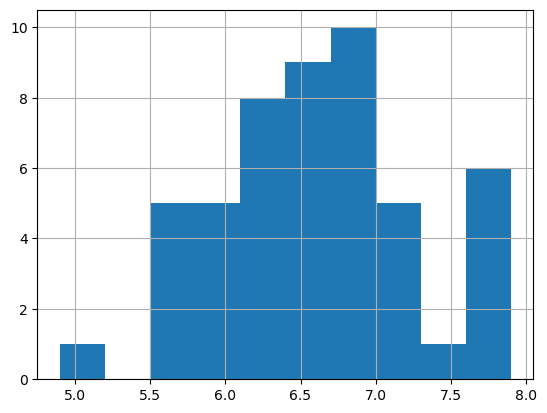

In [55]:
virginica_sepal_length.hist()


<AxesSubplot:>

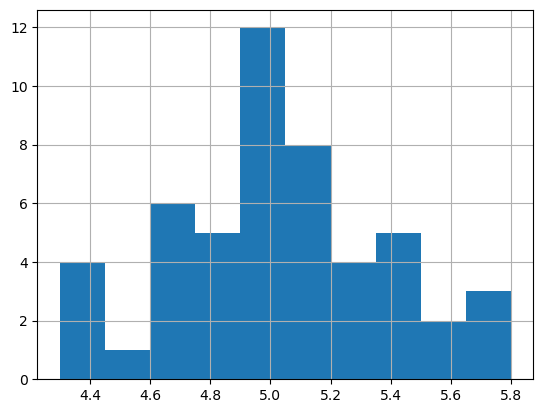

In [56]:
setosa_sepal_length.hist()


<AxesSubplot:>

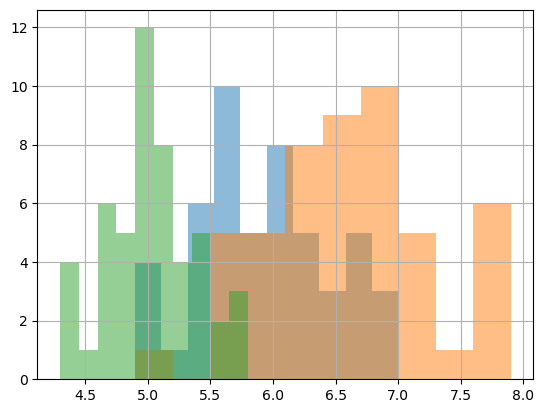

In [62]:
versicolor_sepal_length.hist(alpha=.5)
virginica_sepal_length.hist(alpha=.5)
setosa_sepal_length.hist(alpha=.5)

In [151]:
mpg1 = sns.load_dataset('mpg')
mpg1.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [152]:
#nulls anywhere?
mpg1.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [153]:
# drop nulls
mpg1 = mpg1[~mpg1.horsepower.isna()]
mpg1.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [154]:
mpg1.origin.value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

#### is horsepower of vehicles different across the distinct origins of the vehicles?

$H_{0}$: mean_horsepower_USA = mean_horsepower_JPN = mean_horsepower_EUR  
$H_{a}$: mean horsepowers from at least 2 countries are significantlly different

Assumptions  
1. At least 30 observations: met (see value counts above)  
2. Equal population variance across all 3 groups  
3. Groups are independent of each other  

<AxesSubplot:>

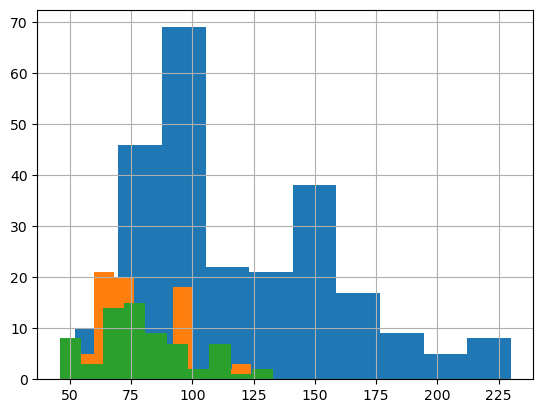

In [155]:
# lets look at the values of each of these and the histograms

mpg1[mpg1.origin=='usa'].horsepower.hist()
mpg1[mpg1.origin=='japan'].horsepower.hist()
mpg1[mpg1.origin=='europe'].horsepower.hist()

In [156]:
# creating a series of horsepower for each country
usa = mpg1[mpg1.origin == 'usa'].horsepower
japan = mpg1[mpg1.origin == 'japan'].horsepower
europe = mpg1[mpg1.origin == 'europe'].horsepower

In [157]:
# validate the variance assumption

stats.levene(usa, japan, europe)

LeveneResult(statistic=26.526632103545772, pvalue=1.5863075873913356e-11)

With low p-value, we can assume the variances of the countries horsepower is significantly different
across at least 2 of the countries
With this information, we should not use the ANOVA test, but should instead use Kruskal-Wallis

In [81]:
test_statistic, p_value = stats.kruskal(usa,japan,europe)

In [82]:
p_value

1.1759521262123952e-23

With p-value < 0.05 (alpha) we can say there exists a significant difference between the horsepower of vehicles in 
at 2 of the countries. But which 2?

Compare 2 groups, usa and japan

H_0: hp_usa == hp_japan  
H_a: hp_usa != hp_japan

In [85]:
t, p = stats.ttest_ind(usa,japan, equal_var=False)

if p < 0.05:
    print('There is a significant difference between the horsepower of vehicles in the USA vs JAPAN')
else:
    print('We failed to find a significant difference')

There is a significant difference between the horsepower of vehicles in the USA vs JAPAN


In [89]:
t, p = stats.ttest_ind(usa,europe, equal_var=False)

if p < 0.05:
    print(f'There is a significant difference between the horsepower of vehicles in the USA vs EUROPE. (p-value: {p})')
else:
    print('We failed to find a significant difference')

There is a significant difference between the horsepower of vehicles in the USA vs EUROPE. (p-value: 2.1065705369888018e-22)


In [94]:
t, p = stats.ttest_ind(europe,japan, equal_var=False)

if p < 0.05:
    print('There is a significant difference between the horsepower of vehicles in the EUROPE vs JAPAN')
else:
    print(f'We failed to find a significant difference (p-value: {p})')

We failed to find a significant difference (p-value: 0.8193616065509621)


### Answer with the type of test you would use (assume normal distribution):

##### Is there a difference in grades of students on the second floor compared to grades of all students?  
  

   


one sample t test, 2 tail

##### Are adults who drink milk taller than adults who dont drink milk?

independent t test, 1 tail

##### Is the the price of gas higher in texas or in new mexico?  

independent t test, 1 tail

##### Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

ANOVA test

Load the mpg dataset and use it to answer the following questions:  

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?  
independent t-test

In [158]:
mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [159]:

mpg['year'].value_counts()


1999    117
2008    117
Name: year, dtype: int64

In [160]:
mpg['average_mileage'] = (mpg.cty + mpg.hwy) / 2
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [261]:
mpg.groupby('year')['average_mileage'].mean()


year
1999    20.222222
2008    20.076923
Name: average_mileage, dtype: float64

Null: there is no difference in fuel eff between cars made in 2008 and 1999  
Alternative: there is a significant difference in fuel eff between cars made in 2008 and 1999

In [189]:
fuel_e_08 = mpg[mpg.year == 2008].average_mileage
fuel_e_99 = mpg[mpg.year == 1999].average_mileage


<AxesSubplot:>

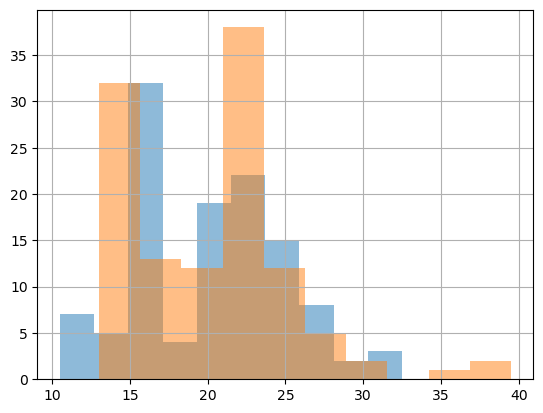

In [188]:
mpg[mpg.year == 2008].average_mileage.hist(alpha=.5)
mpg[mpg.year == 1999].average_mileage.hist(alpha=.5)

In [269]:
test_statistic, p_value = stats.kruskal(fuel_e_08, fuel_e_99)

In [270]:
p_value

0.7482541485808683

In [271]:
alpha = .05

t, p = stats.ttest_ind(fuel_e_08, fuel_e_99, equal_var=False)

if p < 0.05:
    print('Reject Null')
else:
    print(f'We failed to reject null (p-value: {p})')

We failed to reject null (p-value: 0.8263750772060638)


Takeaway: we failed to rejected the null hypothesis, and there is no significant difference bwtween fuel eff between cars made in 1999 and 2008

Are compact cars more fuel-efficient than the average car?  
1 sample t test  
1 tail

Null: compact cars are not more effienct than the average car  
Alternative: compact cars are more effienct than the average car

In [272]:
mpg.groupby('class')['average_mileage'].mean()

class
2seater       20.100000
compact       24.212766
midsize       23.024390
minivan       19.090909
pickup        14.939394
subcompact    24.257143
suv           15.814516
Name: average_mileage, dtype: float64

In [273]:
compact_eff = mpg[mpg['class'] == 'compact']['average_mileage']

In [274]:
compact_eff

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
6      22.0
7      22.5
8      22.0
9      20.5
10     24.0
11     23.0
12     20.0
13     21.0
14     21.0
15     20.0
142    25.0
143    23.0
170    22.5
171    23.5
172    22.0
173    23.5
187    24.0
188    25.0
189    26.0
190    26.5
191    22.0
192    22.0
193    22.5
194    27.0
195    28.5
196    30.5
197    32.5
198    30.5
208    25.0
209    22.5
210    25.0
211    25.5
212    20.5
213    38.5
214    25.0
215    22.5
216    25.5
217    25.0
218    25.0
219    25.0
220    19.5
221    20.5
Name: average_mileage, dtype: float64

In [276]:
mean_eff = mpg['average_mileage'].mean()
mean_eff

20.14957264957265

In [277]:
t3, p3 = stats.ttest_1samp(compact_eff, mean_eff)
t3, p3

(7.896888573132533, 4.198563794317163e-10)

In [279]:
alpha = .05

if t3 > 0 and p3 <= alpha/2:
    print('Reject Null')
else:
    print('We failed to reject null')

Reject Null


Takeaway: reject the null hypothesis; compact cars are more effienct than the average car

Do manual cars get better gas mileage than automatic cars?  

Null: manual cars are not more effcient than automatics  
Alternative: manual cars are more effcient than automatics

In [212]:
mpg['is_automatic'] = mpg.trans.str.startswith('a')

mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,True
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,False
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,True
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,False


In [280]:
manual_eff = mpg[mpg['trans'].str.startswith('m')]['average_mileage']
auto_eff = mpg[mpg['trans'].str.startswith('a')]['average_mileage']

In [281]:
manual_eff.var(), auto_eff.var()

(26.635167464114826, 21.942777233382337)

In [282]:
t4, p4 = stats.ttest_ind(manual_eff, auto_eff, equal_var=False)
t4, p4

(4.443514012903072, 1.7952248999917893e-05)

In [283]:
alpha = .05

if t4 > 0 and p4 < alpha:
    print('Reject Null')
else:
    print('We failed to reject null')

Reject Null


Takeaway: manual cars are significantly more efficient than automatic cars

In [226]:
mpg.groupby('is_automatic')['average_mileage'].mean()

is_automatic
False    22.227273
True     19.130573
Name: average_mileage, dtype: float64

In [227]:
gas_mileage = mpg.groupby('is_automatic')['average_mileage']

is_automatic
False    AxesSubplot(0.125,0.11;0.775x0.77)
True     AxesSubplot(0.125,0.11;0.775x0.77)
Name: average_mileage, dtype: object

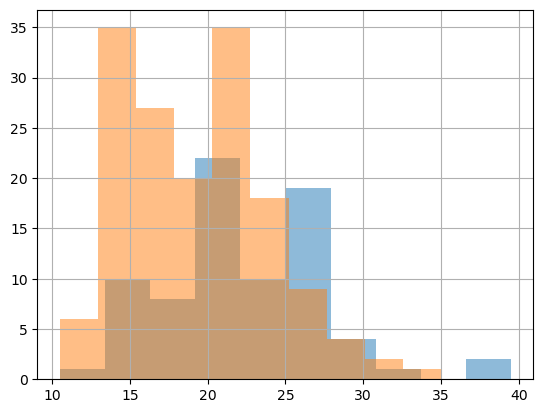

In [228]:
gas_mileage.hist(alpha =.5)

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.



In [253]:
office_one = stats.norm(90, 15)
office_two = stats.norm(100, 20)

In [254]:
office_one

In [255]:
# get some random values (40 sales) for office one sample

office_one.rvs(40)

array([ 73.71554095, 104.9601817 ,  94.24467747,  67.40557929,
        81.32099622, 114.77154806,  53.59981135,  83.56631057,
       108.98904388,  76.99889397,  79.81670773,  88.57936547,
       112.37084439,  80.41647005,  83.34027061,  83.48473087,
       123.08895124, 122.80179133, 105.06080847,  95.79279599,
       101.06052864, 112.36098042,  75.96249197, 107.63743567,
        71.19178998,  80.43372746, 103.60657794,  68.5697895 ,
        87.8989692 ,  77.07367656,  86.16570944,  48.02116342,
        63.42700343,  79.50184148, 103.91193648,  87.39546476,
        90.04268874, 100.32334067,  76.80695485,  94.25440986])

In [256]:
dist_one = office_one.rvs(40)
dist_two = office_two.rvs(50)

In [257]:
dist_one.var(), dist_two.var()

(282.2599600468413, 465.82840550772147)

In [258]:
stats.levene(dist_one, dist_two)

LeveneResult(statistic=2.0403684615910986, pvalue=0.15671226486123732)

In [259]:
t, p = stats.ttest_ind(dist_one, dist_two, equal_var=False)
t,p

(-2.339391650498879, 0.0215804214141492)

Null: there's no difference between the two distributions  
Alternative: there's a significant difference between the two distributions

In [260]:
alpha = 0.05

if p <= alpha:
    print('Reject null')
else:
    print('Fail to reject null')

Reject null


Takeaway: we rejected the null hypothesis, and there is a significant difference between the two offices

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from scipy import stats
from pydataset import data

url = "https://gist.githubusercontent.com/ryanorsinger/2c13a71421037af127e9fa7fa1463cad/raw/3eb443414078b51af33fdb2d211159e5f3e220ab/exam_scores.csv"
df = pd.read_csv(url)

df.head(3)


,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6


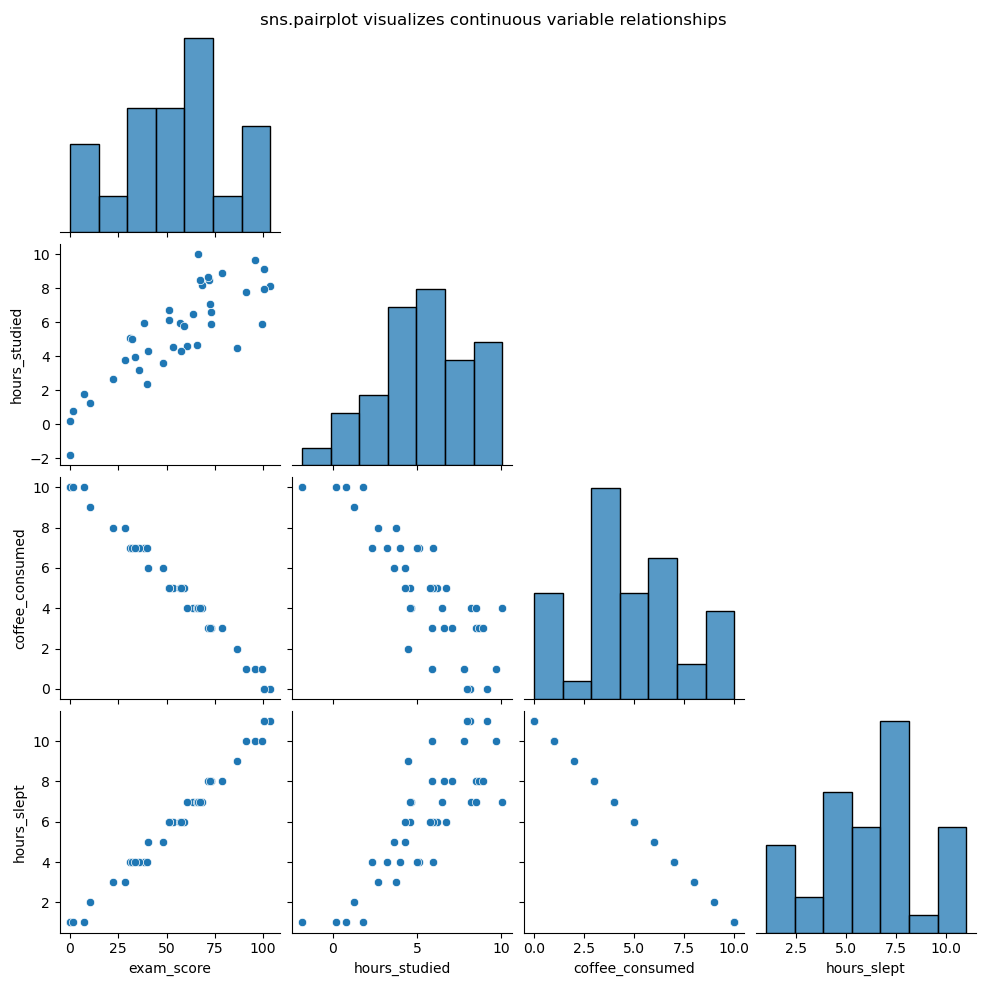

In [6]:
sns.pairplot(df, corner=True)
plt.suptitle("sns.pairplot visualizes continuous variable relationships")
plt.show()


In [8]:
n = df.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval


In [ ]:
## correlation

Goal: determine if two samples have a linear relationship
    
### pearson's r

- 2 continious variables

Null: no linear relationship exists
Alternative: a linear relationship exists

In [ ]:
## setting up for the Test for Correlation

# number of hours studied
# exam score

Null: no linear relationship between number of hours studied and the exam score
Alternative: there is a relationship between number of hours studied and the exam score

In [9]:
# retrieve x and y values 

x = df.hours_studied
y = df.exam_score

# function that will find the standard deviation of a set of values
# first it calculates the variance

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

# apply the results to the formula for pearson's r

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
r_xy

# the pearson's r value is r_xy

0.8351498542413306

In [10]:
# find a p-value

t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
t

# t-statistic for exam scores and hours studied
# calculated with (40-2) = 38 degrees of freedom

9.359998377263368

In [11]:
# find the p value based on the t-statistic

# doubled p-value
p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
p


2.0762953315463266e-11

In [12]:
# compare alpha

p < alpha

True

In [ ]:
## conclusion

# reject the null hypothesis
# reject that there is no linear relationship
# reject that there is no correlation


In [ ]:
df.plot.scatter(y='exam_score', x='hours_studied')

In [13]:
# the easy way

corr, p = stats.pearsonr(x, y)
corr, p


(0.8351498542413305, 2.0762953315463534e-11)

In [14]:
## non linear relationship

x = np.linspace(-3, 3)
y = x ** 2
plt.scatter(x, y, s=10, c='firebrick', alpha=.8)


In [15]:
r, p = stats.pearsonr(x, y)
print(f'r = {r:.5f}')
print(f'p = {p:.1f}')

r = -0.00000
p = 1.0


In [16]:
# coffee consumed and exam score


# the pearson's r and p-value
r, p = stats.pearsonr(df.coffee_consumed, df.exam_score)
# scatter plot
df.plot.scatter('coffee_consumed', 'exam_score')
# format is 'y variable vs x variable'
plt.title('Exam Score vs # Cups of Coffee')
# display the pearson's r coefficient on the graph
plt.text(8, 80, f'r = {r:.3f}')


Text(8, 80, 'r = -0.994')

In [17]:
# pearson's r and p-value for the relationhip between hours slept and coffee consumed
r_sleep_coffee, _ = stats.pearsonr(df.hours_slept, df.coffee_consumed)
# pearson's r and p-value for the relationhip between hours slept and exam score
r_sleep_score, _ = stats.pearsonr(df.hours_slept, df.exam_score)

print('Correlation between hours slept and coffee consumed')
print(f'  r = {r_sleep_coffee:.3f}')
print('Correlation between hours slept and exam score')
print(f'  r = {r_sleep_score:.3f}')


# hours slept and the exam score

# hours slpet and coffee consumed

Correlation between hours slept and coffee consumed
  r = -1.000
Correlation between hours slept and exam score
  r = 0.994


### Answer with the type of stats test you would use (assume normal distribution):  
#### Is there a relationship between the length of your arm and the length of your foot?  
Peqarson's R / Spearmans

#### Do guys and gals quit their jobs at the same rate?
independent t test (2-tailed)

#### Does the length of time of the lecture correlate with a students (numeric) grade?
Peqarson's R / Spearmans

### Does tenure correlate with monthly charges?

In [18]:
import env
pd.options.display.max_columns = None

db_url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/telco_churn'
telco_df = pd.read_sql('SELECT * FROM customers', db_url)  

In [19]:
telco_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,Yes,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,No,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,No,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,Yes,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,No,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [33]:
x = telco_df.tenure
y = telco_df.monthly_charges



In [50]:
r, p = stats.spearmanr(x, y)
r, p

(0.2753387429197595, 1.535767470847339e-122)

In [55]:
alpha = 0.05

def eval_result(alpha,p):
    if p < alpha:
        return print(f'reject the null hypothesis, there is a linear correlation')
    else:
        return print(f' we f ail to reject the null hypothesis, that there is a linear correlation')


In [56]:
eval_result(alpha,p)

reject the null hypothesis, there is a linear correlation


**Takeaways**

There is a correlation between monthly charges and tenure.  

_____________________________________________________________


B. Does Tenure correlate with total charges?  

1. state our hypothesis, set our alpha value    
2. select the data, check for nulls, fun .info     
3. plot the data  
4. test for assumptions (normal distrubution for correlation)  
5. run test  
6. draw conclusions  

Hypothesis:

null: there is no linear correlation between tenure and total charges  
alternative: there is a linear correlation between tenure and total charges 

### Total charges?


In [40]:
alpha = 0.05

# select the data

telco_df[['tenure', 'total_charges']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tenure         7032 non-null   int64  
 1   total_charges  7032 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 164.8 KB


In [23]:
telco_df['total_charges'] = pd.to_numeric(telco_df.total_charges.str.replace(" ", ""))



In [24]:
telco_df = telco_df.dropna()
telco_df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,Yes,No,Yes,Yes,No,2,Yes,2,65.60,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,No,No,No,No,Yes,1,No,2,59.90,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,No,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,Yes,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,No,No,Yes,Yes,No,1,Yes,2,83.90,267.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,No,No,Yes,No,No,2,No,2,55.15,742.90,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,No,No,No,No,Yes,1,Yes,1,85.10,1873.70,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,Yes,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,No,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


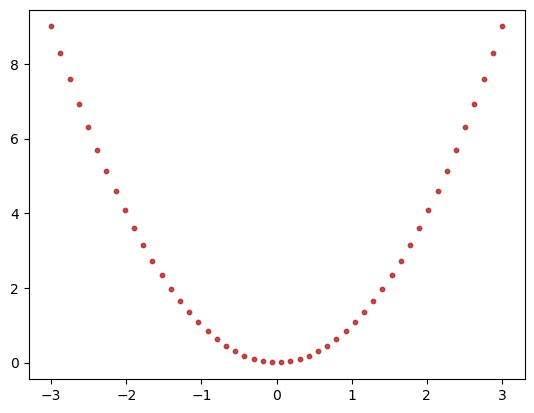

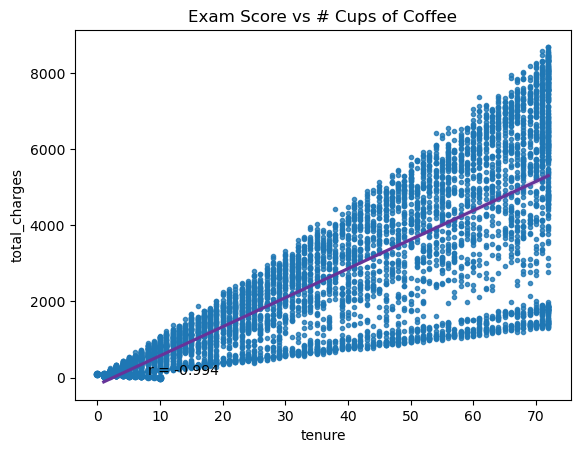

In [44]:
sns.regplot(x= 'tenure', y='total_charges', data = telco_df, marker = '.', line_kws={'color': 'rebeccapurple'})
plt.show()

In [57]:
x = telco_df.tenure
y = telco_df.total_charges

In [58]:
r, p = stats.spearmanr(x, y)
r, p

(0.8891770805365491, 0.0)

In [60]:
p < α

True

In [61]:
eval_result(alpha,p)

reject the null hypothesis, there is a linear correlation


**takeway**  

There is a linear correlation between tenure and total charges. With an r of .89, the correlation is strong   



### What happens if you control for phone and internet service?

lets look at customers who have phone service and no internet


1. state our hypothesis, set our alpha value
2. select the data, check for nulls, fun .info
3. plot the data
4. test for assumptions (normal distrubution for correlation)
5. run test
6. draw conclusions

Hypothesis: of customer who only have phone service

null: there is no linear correlation between tenure and monthly charges
alternative: there is a linear correlation between tenure and monthly charges

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1736 entries, 0 to 7041
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           1736 non-null   int64  
 1   monthly_charges  1736 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 40.7 KB


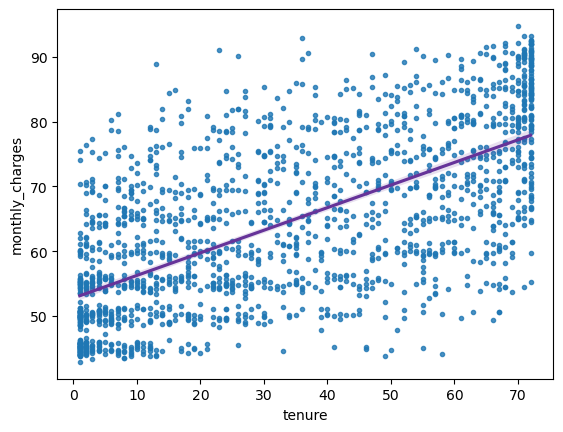

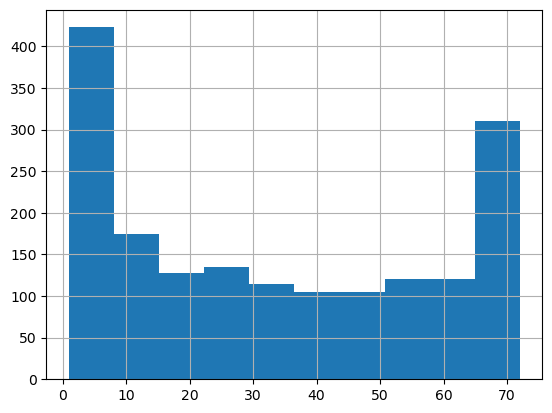

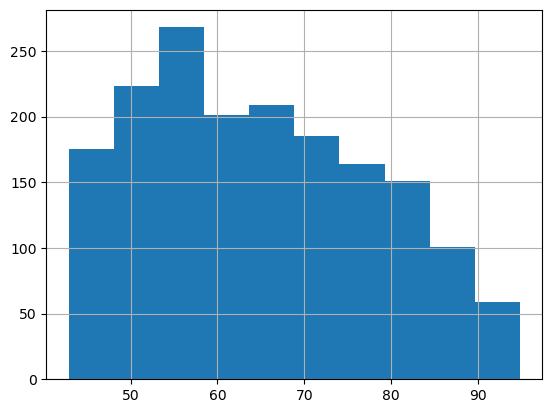

In [119]:
# set alpha
alpha - 0.05

# select data

phone_df = telco_df[(telco_df.phone_service == 'Yes') & (telco_df.internet_service_type_id == 1)][['tenure', 'monthly_charges']]

phone_df.info()

# plot data

sns.regplot(x='tenure', y='monthly_charges', data=phone_df, marker='.', line_kws=({'color': 'rebeccapurple'}))
plt.show()            


# check for normal distrubution

phone_df.tenure.hist()
plt.show()
phone_df.monthly_charges.hist()
plt.show()



We will use Spearmans test due to violation of assumption of normality

In [120]:
stats.spearmanr(phone_df.tenure, phone_df.monthly_charges)

eval_result(alpha, p)

print(f'r value = {r}')

reject the null hypothesis, there is a linear correlation
r value = 0.5228138502259547


**takeaways**

There is a moderate-strong correlation between tenure and monthly charges for custoemrs who have only phone service

### Use the employees database.

In [30]:
import env
import os

# create the url variable (string) with my username, password and host inserted
url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/employees'

In [125]:
query = '''
SELECT *
FROM employees
JOIN salaries USING (emp_no)
WHERE to_date = '9999-01-01';
'''

In [126]:

employees_df = pd.read_sql(query, url)
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   salary      240124 non-null  int64 
 7   from_date   240124 non-null  object
 8   to_date     240124 non-null  object
dtypes: int64(2), object(7)
memory usage: 16.5+ MB


#### Is there a relationship between how long an employee has been with the company and their salary?  

1. state our hypothesis, set our alpha value
2. select the data, check for nulls, fun .info
3. plot the data
4. test for assumptions (normal distrubution for correlation)
5. run test
6. draw conclusions

Hypothesis: Is there a relationship between how long an employee has been with the company and their salary?  

null: there is no linear correlation between employee tenure and salary  
alternative: there is a linear correlation between tenure and salary  

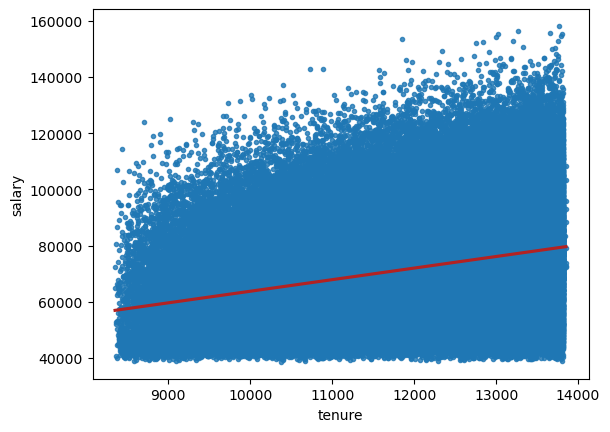

In [127]:
alpha = 0.05

# select our data
employees_df['tenure'] = pd.to_datetime('today') - pd.to_datetime(employees_df.hire_date)

employees_df['tenure'] = employees_df.tenure.astype('str').str.split(' ', expand=True)[0].astype('int')

# employees_df.info()
tenure_df = employees_df[['tenure', 'salary']]

# plot the data

sns.regplot(x='tenure', y='salary', data=tenure_df, marker= '.', line_kws=({'color': 'firebrick'}))
plt.show()

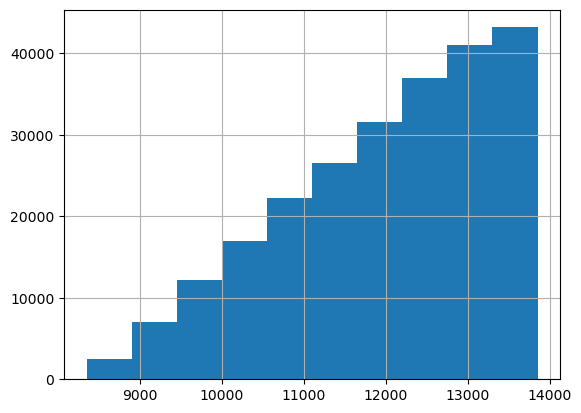

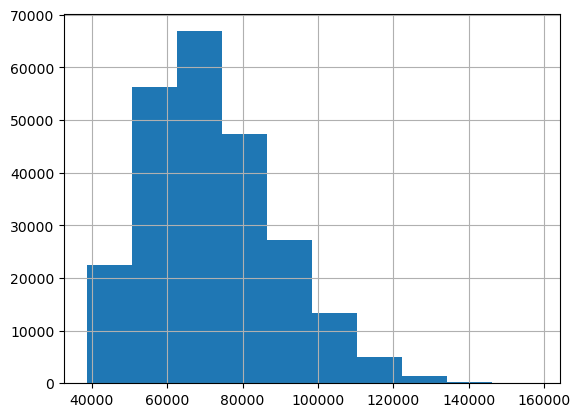

In [90]:
# look at distribution, look for normality

tenure_df.tenure.hist()
plt.show()
tenure_df.salary.hist()
plt.show()

distributions are not normal, so we will use spearmans test

In [93]:
# run test
r, p = stats.spearmanr(tenure_df.tenure, tenure_df.salary)

# evaluate restuls
eval_result(alpha, p)
print('r value: ', r)

reject the null hypothesis, there is a linear correlation
r value:  0.3128783525010577


**takeaways**

There is a moderate correlation between tenure and salary

#### Is there a relationship between how long an employee has been with the company and the number of titles they have?

1. state our hypothesis, set our alpha value
2. select the data, check for nulls, fun .info
3. plot the data
4. test for assumptions (normal distrubution for correlation)
5. run test
6. draw conclusions

Hypothesis: Is there a relationship between how long an employee has been with the company and the number of titles they have?

null: there is no linear correlation between employee tenure and number of titles  
alternative: there is a linear correlation between tenure and number of titles 

In [128]:
# set alpha
alpha = 0.05

# select data



In [133]:
query = '''
SELECT t.emp_no, count(t.title) as num_titles, te.tenure
FROM titles t
JOIN (SELECT emp_no, datediff(now(), min(from_date)) As tenure
      FROM titles
      GROUP BY emp_no
      HAVING max(to_date) = '9999-01-01'
) te using(emp_no)
GROUP BY t.emp_no;
'''

In [134]:
employees_df = pd.read_sql(query, url)
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   emp_no      240124 non-null  int64
 1   num_titles  240124 non-null  int64
 2   tenure      240124 non-null  int64
dtypes: int64(3)
memory usage: 5.5 MB


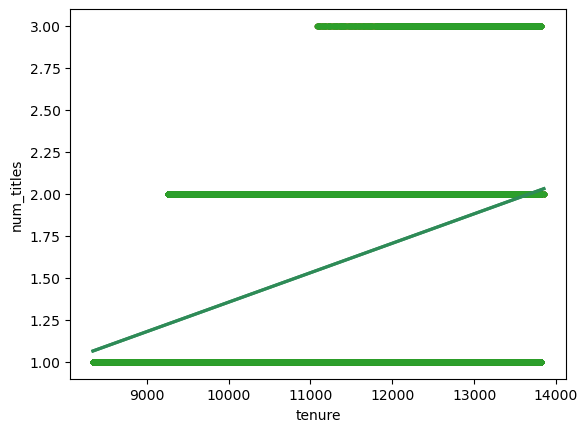

In [137]:
# plot the data

employees_df = employees_df[['num_titles', 'tenure']]

sns.regplot(x='tenure', y='num_titles', data=employees_df, marker='.', line_kws=({'color': 'seagreen'}))
plt.show()

Because the number of titles is a discrete value, we should run an ANOVA or a kruskal Wallis test to test 
whether the average salary of those with 1 title is different from those with 2, or 2 different from 3, etc

Assumptions: 
1. do they have equal variance? YES. 
2. are there enough observations? YES.  
3. are they independent of each other? YES.    


In [138]:
# observations:
employees_df.num_titles.value_counts()

2    125345
1    111892
3      2887
Name: num_titles, dtype: int64

In [139]:
# equal variance?
# h_o the variance is equal
# h_a the variances are significantly different

stats.levene(employees_df.num_titles, employees_df.tenure)

LeveneResult(statistic=718602.1569097865, pvalue=0.0)

The variances are significantly different; therefore we will use the Kruskal Wallis test

In [142]:
stats.kruskal(employees_df.num_titles, employees_df.tenure)

KruskalResult(statistic=371488.64419334417, pvalue=0.0)

**takeaway**

There is a difference in tenure and number of titles an employee has held

### Use the sleepstudy data.
#### Is there a relationship between days and reaction time?

In [110]:
df = data('sleepstudy')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


H_0: there is no linear correlation between days and reaction time  
H_a: there is a linear correlation between days and reaction time

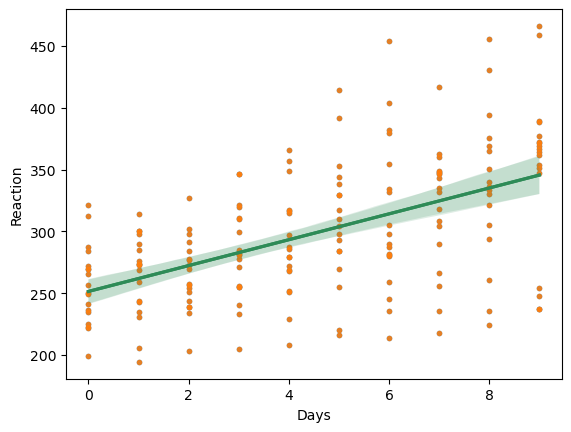

In [113]:
alpha = 0.05

# select data

df = df[['Reaction', 'Days']]

# plot the data
sns.regplot(x='Days', y='Reaction', data=df, marker='.', line_kws=({'color': 'seagreen'}))
plt.show()

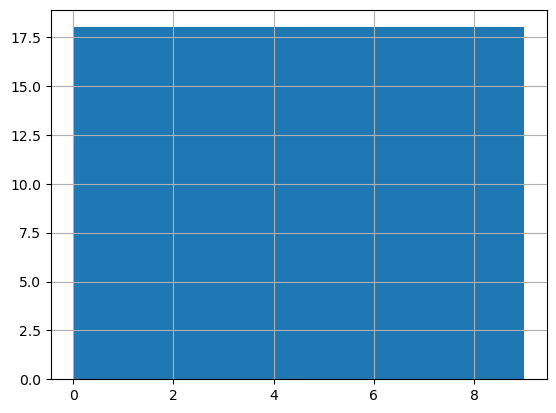

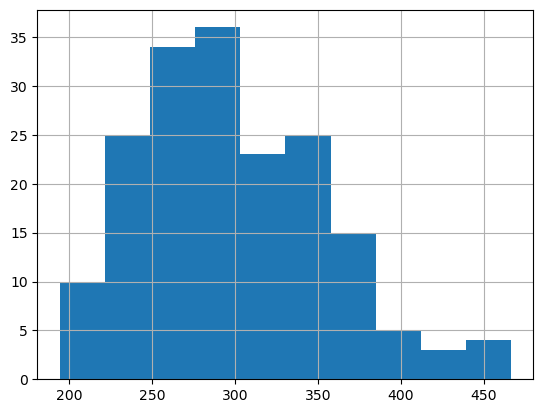

In [116]:
# check for normal distrubution, plot histogram

df.Days.hist()
plt.show()
df.Reaction.hist()
plt.show()

Days in uniformaly distributed and reaction time is normally distributed

In [118]:
# run the spearman test

r, p = stats.spearmanr(df.Days, df.Reaction)
eval_result(alpha, p)
print('r value: ', r)

reject the null hypothesis, there is a linear correlation
r value:  0.5228138502259547


**takeaway**  

There is a moderate correlation between days and reaction time